In this notebook a more sophisticated algorithm is presented. The tree levels are built seperately (because they represent different days).  

The tree is visualized, the longest path can be found (needs to be checked)

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

# adding project folder to lib search path
project = os.path.split(os.getcwd())[0]
if project not in sys.path:
    sys.path.append(project)
    
from HIV_project.scripts.loader import Loader
from HIV_project.scripts.patient import Patient
from HIV_project.scripts.aa_properties import aaprop_sequence
from HIV_project.scripts.tree_building import Tree
from HIV_project.scripts.graph import Graph
from igraph import plot, rescale

In [2]:
# selecting patient
patient = Patient('p1')

C:\Users\ALEX\Anaconda3\lib\site-packages\Bio\Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [3]:
# building a tree
tree = Tree(patient.regions['psi'])
tree.build()

In [4]:
# starting to plot the tree
vertices = [i for i in range(len(tree.mapping))]
edges = tree.graph

g = Graph()
g.add_vertices(vertices)

# setting correct weights
g.set_edge_weights(edges)

In [5]:
# getting the longest path
max_weight, max_path, edges = g.find_longest_path(tree)
print(f'Longest path {max_path} has weight {int(max_weight)}')

Longest path [0, 2, 4, 9, 17, 19, 26, 30, 35, 38, 42, 47, 52] has weight 988


In [6]:
# colouring the edges of the longest path
g.colour_path(edges)

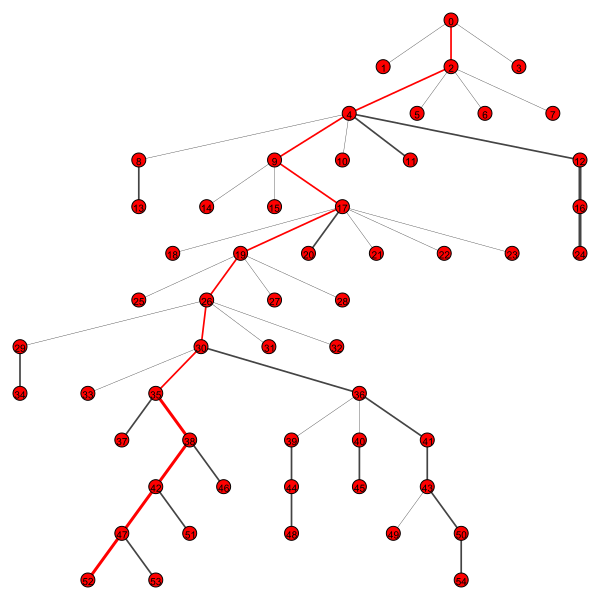

In [7]:
# plotting now
layout = g.layout_reingold_tilford(mode='in', root=[tree.mapping[(tree.start_day, tree.root.seq)]])

plot(g, layout=layout, vertex_label=vertices, vertex_label_size=10, vertex_size=14, 
     edge_width=rescale(g.es['weight'], out_range=(0.4, 3)))

In [8]:
# all paths from vertex 0 to the vertices of the last day
g.all_paths()

[[0, 2, 4, 9, 17, 19, 26, 30, 35, 38, 42, 47, 52],
 [0, 2, 4, 9, 17, 19, 26, 30, 35, 38, 42, 47, 53],
 [0, 2, 4, 9, 17, 19, 26, 30, 36, 41, 43, 50, 54]]

In [9]:
# info about the chosen path
tree.path_info(max_path)

,day,seq,freq
0,0,CTCGGCTTGCTGAGGTGCACACAGCAAGAGGCGAGAGCGGCGACTG...,100.0
1,122,CTCGGCTTGCTGAGGTGCACACAGCAAGAGGCGAGAGCGGCGACTG...,96.0
2,562,CTCGGCTTGCTGAGGTGCACACAGCAAGAGGCGAGAGCGGCGACTG...,94.0
3,1084,CTCGGCTTGCTGAGGTGCACACAGCAAGAGGCGAGAGCGGCGACTG...,87.0
4,1254,CTCGGCTTGCTGAGGTGCACACAGCAAGAGGCGAGAGCGGCGACTG...,92.0
5,1282,CTCGGCTTGCTGAGGTGCACACAGCAAGAGGCGAGAGCGGCGACTG...,89.0
6,1393,CTCGGCTTGCTGAGGTGCACACAGCAAGAGGCGAGAGCGGCGACTG...,95.0
7,1861,CTCGGCTTGCTGAGGTGCACACAGCAAGAGGCGAGAGCGGCGACTG...,92.0
8,2303,CTCGGCTTGCTGAGGTGCACACAGCAAGAGGCGAGAGCGGCGACTG...,1.0
9,2578,CTCGGCTTGCTGAGGTGCACACAGCAAGAGGCGAGAGCGGCGACTG...,2.0
